In [1]:
import tensorflow as tf                             
from matplotlib import pyplot as plt                        
import numpy as np
from tensorflow.keras.layers import Dense, Activation, SimpleRNN
from tensorflow.keras.utils import to_categorical, plot_model

In [2]:
from keras.datasets import mnist
objects=mnist
(train_img,train_lab),(test_img,test_lab)=objects.load_data()

11501568/11490434 [==============================] - 0s 0us/step


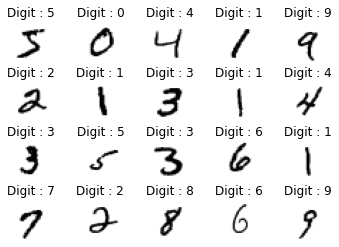

In [3]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(train_img[i],cmap='gray_r')
  plt.title("Digit : {}".format(train_lab[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

In [4]:
print('Training images shape : ',train_img.shape)
print('Testing images shape : ',test_img.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [5]:
print('How image looks like : ')
print(train_img[0])

How image looks like : 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 25

In [7]:
train_img=train_img/255.0
test_img=test_img/255.0

In [8]:
print('How image looks like after normalising: ')
print(train_img[0])

How image looks like after normalising: 
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0. 

In [10]:
batch_size = 128
units = 256
dropout = 0.2
input_shape = (28, 28)

In [11]:
from keras.models import Sequential
from keras.layers import Flatten,Dense
model=Sequential()
model.add(SimpleRNN(units=units,
                    dropout=dropout,
                    input_shape=input_shape))
hidden_layer2=Dense(10)
model.add(hidden_layer2)
output_layer=Dense(10,activation='softmax')
model.add(output_layer)

In [12]:
#compiling the sequential model
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [13]:
model.fit(train_img,train_lab,epochs=25,batch_size=batch_size)

Epoch 1/25
469/469 [==============================] - 23s 41ms/step - loss: 0.3792 - accuracy: 0.8831
Epoch 2/25
469/469 [==============================] - 19s 41ms/step - loss: 0.1967 - accuracy: 0.9421
Epoch 3/25
469/469 [==============================] - 19s 41ms/step - loss: 0.1561 - accuracy: 0.9537
Epoch 4/25
469/469 [==============================] - 21s 45ms/step - loss: 0.1456 - accuracy: 0.9580
Epoch 5/25
469/469 [==============================] - 19s 41ms/step - loss: 0.1329 - accuracy: 0.9614
Epoch 6/25
469/469 [==============================] - 20s 42ms/step - loss: 0.1224 - accuracy: 0.9638
Epoch 7/25
469/469 [==============================] - 19s 42ms/step - loss: 0.1153 - accuracy: 0.9658
Epoch 8/25
469/469 [==============================] - 19s 41ms/step - loss: 0.1183 - accuracy: 0.9658
Epoch 9/25
469/469 [==============================] - 19s 41ms/step - loss: 0.1073 - accuracy: 0.9682
Epoch 10/25
469/469 [==============================] - 20s 42ms/step - loss: 0.103

In [14]:
model.save('project.h5')

In [15]:
loss_and_acc=model.evaluate(test_img,test_lab,verbose=2)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 - 2s - loss: 0.0975 - accuracy: 0.9722 - 2s/epoch - 7ms/step
Test Loss 0.097517229616642
Test Accuracy 0.9721999764442444


Predicted Value:  7
Successful prediction


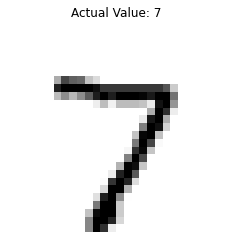

In [16]:
plt.imshow(test_img[0],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[0]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[0]))
if(test_lab[0]==(np.argmax(prediction[0]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

Predicted Value:  2
Successful prediction


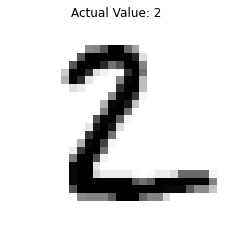

In [17]:
plt.imshow(test_img[1],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[1]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[1]))
if(test_lab[1]==(np.argmax(prediction[1]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

Predicted Value:  1
Successful prediction


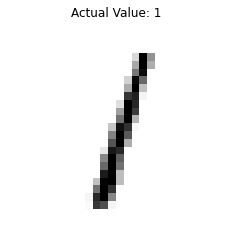

In [18]:
plt.imshow(test_img[2],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[2]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[2]))
if(test_lab[2]==(np.argmax(prediction[2]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')